In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd


In [2]:
#用pandas讀取文件，並顯示前三行內容
raw_df = pd.read_csv('listings-2.csv',encoding='utf-8')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
print('欄位數:',len(raw_df.columns))
raw_df.head(3)


The dataset contains 9937 Airbnb listings
欄位數: 106


C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,68396,https://www.airbnb.com/rooms/68396,20190730190716,2019-07-30,Zhongxiao Dunhua Studio C near MRT,Prime location! Right in the center of Taipei'...,Located at Zhongxiao East Road of Daan distric...,Prime location! Right in the center of Taipei'...,none,NaN,[Additional Service] - Flat Iron and Iron Boar...,NaN,NaN,NaN,[ Tenant Policy ] The minimum stay is 1 mont...,NaN,NaN,https://a0.muscache.com/im/pictures/b82f75f2-8...,NaN,339014,https://www.airbnb.com/users/show/339014,Lisa,2011-01-07,"Taipei, Taiwan",Hello world!! My name is Lisa and I'm super ex...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/339014/profil...,https://a0.muscache.com/im/users/339014/profil...,Da'an,12.0,12.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,"Daan District, Taiwan",Da'an,大安區,NaN,Daan District,NaN,106,Taipei,"Daan District, Taiwan",TW,Taiwan,25.04258,121.55365,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,"$1,555.00",NaN,"$37,310.00","$9,328.00",NaN,2,$0.00,7,365,7,7,365,365,7.0,365.0,2 months ago,t,3,3,30,305,2019-07-30,2,0,2013-05-23,2018-06-20,100.0,9.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Taiwan VAT Tax""}",f,f,strict_14_with_grace_period,f,f,12,12,0,0,0.03
1,68398,https://www.airbnb.com/rooms/68398,20190730190716,2019-07-30,Tonghua Vacation Studio C,Convenient location; close to MRT and walking ...,Private Studio apartment with ensuite bathroom...,Convenient location; close to MRT and walking ...,none,Locates in a quiet neighborhood of Tonghua Str...,Please note that there is no elevator in the b...,7 mind walk to MRT Xinyi Anhe Station 10 minut...,"26"" TV Sofa couch & Coffee table Queen size do...",NaN,[ Tenant Policy ] The minimum stay is 1 mont...,NaN,NaN,https://a0.muscache.com/im/pictures/28357420/c...,NaN,339014,https://www.airbnb.com/users/show/339014,Lisa,2011-01-07,"Taipei, Taiwan",Hello world!! My name is Lisa and I'm super ex...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/339014/profil...,https://a0.muscache.com/im/users/339014/profil...,Da'an,12.0,12.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,"Daan District, Taiwan",Da'an,大安區,NaN,Daan District,NaN,106,Taipei,"Daan District, Taiwan",TW,Taiwan,25.02925,121.

In [3]:
#先刪除爬取與房源相關的欄位資訊
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_identity_verified', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

In [4]:
#顯示各欄的資料空值筆數
df.isna().sum()

id                                                 0
experiences_offered                                0
host_since                                         3
host_response_time                              1141
host_response_rate                              1141
host_acceptance_rate                            9937
host_is_superhost                                  3
host_listings_count                                3
host_total_listings_count                          3
host_has_profile_pic                               3
street                                             0
neighbourhood                                    148
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    9937
city                                             199
state                                            383
zipcode                                          385
market                                             2
smart_location                                

In [5]:
#刪除空值比率過高的欄位，將id欄位設為index
df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license' ], axis=1, inplace=True)

df.set_index('id', inplace=True)

In [6]:
#觀察資料內容發現host_listings_count與host_total_listings_count兩個欄位的數值是完全相同的，比對內容後只有3個不同，主要這三個欄位為空值
print(sum((df.host_listings_count == df.host_total_listings_count) == False))

3


In [7]:
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:3]

,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21393080,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Datong District, Taipei City, Taiwan",Datong,大同區,Datong District,Taipei City,103,Taipei,"Datong District, Taiwan",TW,Taiwan,25.04951,121.51762,t,Condominium,Entire home/apt,8,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...","$4,944.00",$0.00,"$1,200.00",5,$500.00,1,35,1,2,35,35,1.1,35.0,a week ago,t,10,33,47,290,75,49,2017-11-19,2019-07-21,94.0,10.0,9.0,10.0,10.0,10.0,9.0,f,"{""Taiwan VAT Tax""}",t,f,flexible,f,f,3,3,0,0,3.63
23084840,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Datong District, Taipei City, Taiwan",Datong,大同區,Datong District,Taipei City,103,Taipei,"Datong District, Taiwan",TW,Taiwan,25.04968,121.51839,t,Condominium,Entire home/apt,8,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...","$4,944.00",$0.00,"$1,200.00",5,$500.00,1,35,1,2,35,35,1.1,35.0,a week ago,t,10,26,39,271,55,42,2018-04-02,2019-07-28,95.0,9.0,9.0,10.0,10.0,10.0,9.0,f,"{""Taiwan VAT Tax""}",t,f,flexible,f,f,3,3,0,0,3.40
24884689,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Datong District, Taipei City, Taiwan",Datong,大同區,Datong District,Taipei City,103,Taipei,"Datong District, Taiwan",TW,Taiwan,25.04954,121.51799,t,Apartment,Entire home/apt,7,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...","$4,944.00",$0.00,"$1,200.00",5,$500.00,1,35,1,2,35,35,1.1,35.0,yesterday,t,10,29,38,262,39,34,2018-05-18,2019-07-26,95.0,10.0,9.0,10.0,10.0,10.0,10.0,f,"{""Taiwan VAT Tax""}",t,f,flexible,f,f,3,3,0,0,2.67


In [8]:
#刪除host_total_listings_count欄位以及與他相關的欄位
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [9]:
#將經緯度欄位合併，用於後續內容
lat_long = df[['latitude', 'longitude']]

In [10]:
#因為都在台北市，將城市相關的內容刪除
df.drop(['zipcode', 'latitude', 'longitude', 'street', 'neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact','jurisdiction_names'], axis=1, inplace=True)

In [11]:
#除了minimum_nights與maximum_nights之外，minimum_minimum_nights、maximum_minimum_nights定義較不明確
#參考其餘文章後決定保留minimum_nights與maximum_nights，其餘刪除
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [12]:
#將剩餘欄位有 f/t 改為 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

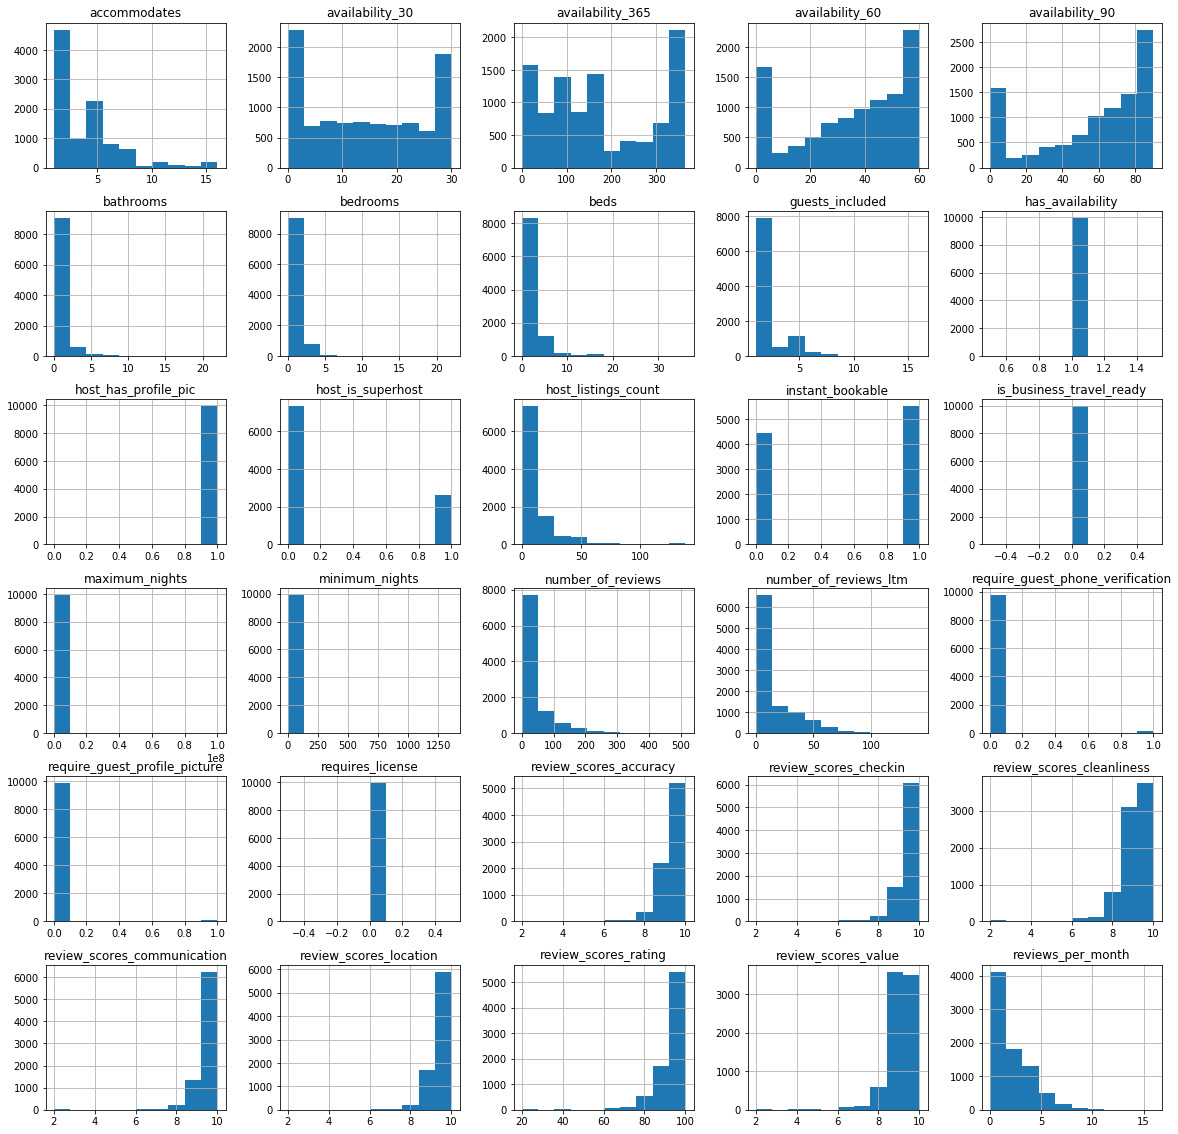

In [13]:
#顯示剩餘欄的直方圖，觀察內容分布
df.hist(figsize=(20,20));

In [14]:
#觀察發現其中有些欄位屬性較為單一，將這些欄位刪除
df.drop(['has_availability', 'host_has_profile_pic', 'is_business_travel_ready', 'require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license'], axis=1, inplace=True)

In [15]:
#顯示剩餘欄位
df.isna().sum()

experiences_offered               0
host_since                        3
host_response_time             1141
host_response_rate             1141
host_is_superhost                 3
host_listings_count               3
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         4
bedrooms                          2
beds                             13
bed_type                          0
amenities                         0
price                             0
security_deposit               3283
cleaning_fee                   2077
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
calendar_updated                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews           

In [16]:
#統計experiences_offered欄位各資料出現次數
df.experiences_offered.value_counts()

none    9937
Name: experiences_offered, dtype: int64

In [17]:
#數值全部都是none，刪除此欄
df.drop('experiences_offered', axis=1, inplace=True)

In [18]:
#用pandas轉換天數
df.host_since = pd.to_datetime(df.host_since) 

#計算房東加入時間到2019.8.1的總天數
df['host_days_active'] = (datetime(2019, 8, 1) - df.host_since).astype('timedelta64[D]')

#顯示平均與中位天數
print("平均 days as host:", round(df['host_days_active'].mean(),0))
print("中位 days as host:", df['host_days_active'].median())

平均 days as host: 1252.0
中位 days as host: 1267.5


In [19]:
#將空值的三筆替換為中位天數
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

In [20]:
#定義等級分布
def bin_column(col, bins, labels, na_label='unknown'):
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [21]:
#將host_since依天數分類為 0~1 years,1-3 years,3-5 years,5-10 years
bin_column('host_days_active',
           bins=[0, 365, 1095, 1825, max(df.host_days_active)],
           labels=['0-1 years',
                   '1-3 years',
                   '3-5 years',
                   '5-10 years'],
           na_label='unknown')

In [22]:
#顯示分類後的各等級筆數
df.host_days_active.value_counts()

3-5 years     4237
1-3 years     2760
5-10 years    1848
0-1 years     1092
Name: host_days_active, dtype: int64

In [23]:
#計算df.host_response_time的空值比例
print("空值筆數:", df.host_response_time.isna().sum())
print(f"空值比例: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

空值筆數: 1141
空值比例: 11.5%


In [24]:
#顯示各項筆數
df.host_response_time.value_counts()

within an hour        7302
within a few hours     890
within a day           480
a few days or more     124
Name: host_response_time, dtype: int64

In [25]:
#將空值補為眾數within an hour
df.host_response_time.fillna("within an hour", inplace=True)
df.host_response_time.value_counts()

within an hour        8443
within a few hours     890
within a day           480
a few days or more     124
Name: host_response_time, dtype: int64

In [26]:
#計算df.host_response_rate的空值比例
print("Null values:", df.host_response_rate.isna().sum())
print(f"空值比例: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 1141
空值比例: 11.5%


In [27]:
#計算df.host_response_rate的平均數與中位數
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')
print("平均 host response rate:", round(df['host_response_rate'].mean(),0))
print("中位數 host response rate:", df['host_response_rate'].median())
print(f"100%回覆的比率: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

平均 host response rate: 96.0
中位數 host response rate: 100.0
100%回覆的比率: 75.8%


In [28]:
#將空值補為平均數
df.host_response_rate.fillna(df.host_response_rate.mean(), inplace=True)
df.host_response_rate.value_counts()

100.00000    6667
96.37176     1141
99.00000      395
98.00000      334
97.00000      170
96.00000      154
90.00000      150
80.00000       97
95.00000       89
0.00000        87
60.00000       62
67.00000       54
50.00000       52
92.00000       52
94.00000       49
75.00000       39
88.00000       38
83.00000       37
93.00000       30
70.00000       27
91.00000       27
65.00000       21
81.00000       18
64.00000       17
20.00000       15
85.00000       14
84.00000       11
86.00000       11
89.00000       10
71.00000        9
77.00000        8
63.00000        7
30.00000        7
69.00000        6
33.00000        6
82.00000        6
87.00000        5
78.00000        3
42.00000        3
25.00000        3
40.00000        2
74.00000        2
29.00000        1
57.00000        1
Name: host_response_rate, dtype: int64

In [29]:
#計算df.host_is_superhost的空值比例
print("空值筆數:", df.host_is_superhost.isna().sum())

空值筆數: 3


In [30]:
#將空值補為0(f)
df.host_is_superhost.fillna(0 , inplace=True)
df.host_is_superhost.value_counts()

0.0    7322
1.0    2615
Name: host_is_superhost, dtype: int64

In [31]:
#計算df.host_listings_count的空值比例
print("空值筆數:", df.host_listings_count.isna().sum())

空值筆數: 3


In [32]:
#將df.host_listings_count依間數分類為 1 room,2~5 rooms,6-10 rooms,11~30 rooms,31~50 rooms,51~100 rooms,100+ rooms
bin_column('host_listings_count',
           bins=[0, 1, 5, 10, 30, 50, 100, max(df.host_listings_count)],
           labels=['1 room',
                   '2-5 rooms',
                   '6-10 rooms',
                   '11-30 rooms',
                   '31-50 rooms',
                   '51-100 rooms',
                   '100+ rooms'],
           na_label='unknown')

In [33]:
#顯示分類後的各等級筆數
df.host_listings_count.value_counts()

2-5 rooms       2679
11-30 rooms     2552
6-10 rooms      2195
1 room          1523
31-50 rooms      574
51-100 rooms     311
100+ rooms       100
nan                3
Name: host_listings_count, dtype: int64

In [34]:
#將空值的三筆補眾數
df.host_listings_count.replace('nan','2-5 rooms', inplace=True)

In [35]:
#顯示分類後的各等級筆數
df.host_listings_count.value_counts()

2-5 rooms       2682
11-30 rooms     2552
6-10 rooms      2195
1 room          1523
31-50 rooms      574
51-100 rooms     311
100+ rooms       100
Name: host_listings_count, dtype: int64

In [36]:
#顯示各區的房間數量
df.neighbourhood_cleansed.value_counts()

萬華區    2411
大安區    1715
中山區    1316
中正區    1302
信義區    1014
大同區     699
松山區     442
士林區     313
北投區     216
文山區     200
內湖區     183
南港區     126
Name: neighbourhood_cleansed, dtype: int64

In [37]:
#顯示各種房源種類數量
df.property_type.value_counts()

Apartment                        5652
Condominium                      1409
Hostel                            495
House                             448
Loft                              369
Serviced apartment                346
Boutique hotel                    335
Other                             163
Guest suite                       139
Townhouse                         116
Hotel                             105
Bed and breakfast                  96
Minsu (Taiwan)                     93
Aparthotel                         59
Guesthouse                         29
Villa                              21
Bungalow                           16
Tent                               14
Dorm                               11
Hut                                 8
Cabin                               4
Heritage hotel (India)              3
Shepherd's hut (U.K., France)       1
Boat                                1
Treehouse                           1
Camper/RV                           1
Casa particu

In [38]:
#顯示各種房間種類數量
df.room_type.value_counts()

Entire home/apt    5535
Private room       3676
Shared room         726
Name: room_type, dtype: int64

In [39]:
#顯示bathrooms、bedrooms、beds三欄的空值比例
print("bathrooms空值筆數:", df.bathrooms.isna().sum())
print(f"空值比例: {round((df.bathrooms.isna().sum()/len(df))*100, 1)}%")
print("bedrooms空值筆數:", df.bedrooms.isna().sum())
print(f"空值比例: {round((df.bedrooms.isna().sum()/len(df))*100, 1)}%")
print("beds空值筆數:", df.beds.isna().sum())
print(f"空值比例: {round((df.beds.isna().sum()/len(df))*100, 1)}%")

bathrooms空值筆數: 4
空值比例: 0.0%
bedrooms空值筆數: 2
空值比例: 0.0%
beds空值筆數: 13
空值比例: 0.1%


In [40]:
#將bathrooms、bedrooms、beds三欄的空值替換為0
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [41]:
#顯示bed_type的各項筆數
df.bed_type.value_counts()

Real Bed         9871
Futon              45
Pull-out Sofa      15
Couch               4
Airbed              2
Name: bed_type, dtype: int64

In [42]:
#由於主要都是Real Bed，將此項刪除
#df.drop('bed_type', axis=1, inplace=True)

In [43]:
#將price的$去除，轉化為int
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [44]:
#顯示保證金的空值比例
print("Null values:", df.security_deposit.isna().sum())
print(f"空值比例: {round((df.security_deposit.isna().sum()/len(df))*100, 1)}%")

Null values: 3283
空值比例: 33.0%


In [45]:
#將保證金的$去除，空值補0，轉化為int
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

count      7903.000000
mean       2174.800709
std        7293.061946
min         311.000000
25%         995.000000
50%        1492.000000
75%        2332.000000
max      310919.000000
Name: price, dtype: float64


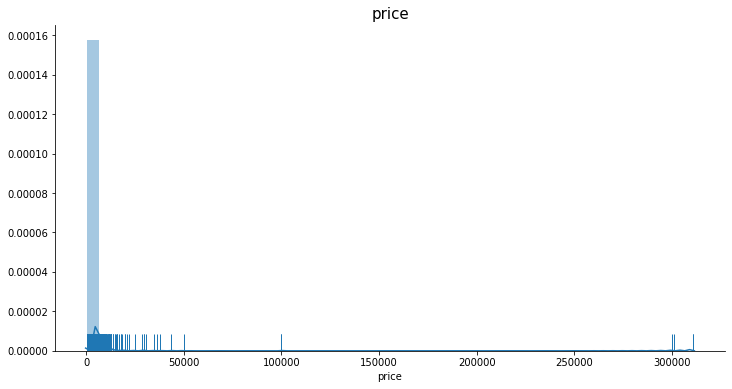

In [75]:

print(df.price.describe())
plt.figure(figsize = (12 , 6))
plt.title('price' , fontsize = 15)
sns.distplot(df.price.dropna() , rug = True)
sns.despine()

In [46]:
#顯示清潔費的空值比例
print("Null values:",df.cleaning_fee.isna().sum())
print(f"空值比例: {round((df.cleaning_fee.isna().sum()/len(df))*100, 1)}%")

Null values: 2077
空值比例: 20.9%


In [47]:
#將清潔費的$去除，空值補0，轉化為int
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

In [48]:
#顯示guests_included的各項筆數
df.guests_included.value_counts()

1     5006
2     2897
4      990
3      508
6      211
5      147
8       83
10      22
7       20
12      17
16      14
9        9
14       8
15       4
11       1
Name: guests_included, dtype: int64

In [49]:
#顯示加人費用的空值比例
print("Null values:",df.extra_people.isna().sum())
print(f"空值比例: {round((df.extra_people.isna().sum()/len(df))*100, 1)}%")

Null values: 0
空值比例: 0.0%


In [50]:
#將加人費用的$去除，空值補0，轉化為int
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

In [51]:
#顯示calendar_updated的各項筆數
print("此行的分類總數:", df.calendar_updated.nunique())
print("\Top 5 分類:")
df.calendar_updated.value_counts()[:5]

此行的分類總數: 70
\Top 5 分類:


today          3781
yesterday       692
2 weeks ago     607
a week ago      580
3 weeks ago     377
Name: calendar_updated, dtype: int64

In [52]:
#因不太清楚此項的相關定義，參考其餘文章後刪除此項
df.drop('calendar_updated', axis=1, inplace=True)

In [53]:
#30天~365天可訂的天數，因無法定義是空房還是房東沒有開放，故刪除
df.drop(['availability_30', 'availability_60','availability_90', 'availability_365'], axis=1, inplace=True)

In [54]:
#顯示first_review和last_review的空值比例
print(f"first_review空值比例: {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"last_review空值比例: {round(100*df.last_review.isna().sum()/len(df),1)}%")

first_review空值比例: 19.8%
last_review空值比例: 19.8%


In [55]:
#用pandas轉換天數
df.first_review = pd.to_datetime(df.first_review) 

#計算房東first_review到2019.8.1的總天數
df['first_review_to_20190801'] = (datetime(2019, 8, 1) - df.first_review).astype('timedelta64[D]')

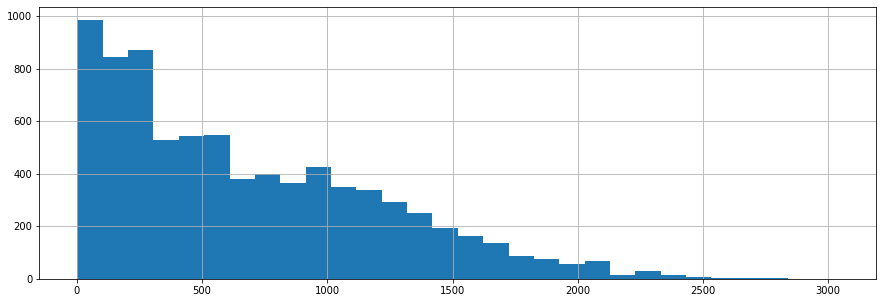

In [56]:
#顯示first_review_to_20190801的天數直方圖
df.first_review_to_20190801.hist(figsize=(15,5), bins=30);

In [57]:
# 將first_review_to_20190801依天數分類為 0-3 months, 3-6 months, 6-12 months,1+ years
bin_column('first_review_to_20190801',
           bins=[0, 91, 182, 365, max(df.first_review_to_20190801)],
           labels=['0-3 months',
                   '3-6 months',
                   '6-12 months',
                   '1+ years'],
           na_label='unknown')

In [58]:
#顯示分類後的各等級筆數
df.first_review_to_20190801.value_counts()

1+ years       4942
nan            1966
6-12 months    1410
0-3 months      848
3-6 months      771
Name: first_review_to_20190801, dtype: int64

In [59]:
#將空值補眾數 1+ years
df.first_review_to_20190801.replace('nan','1+ years', inplace=True)

In [60]:
#顯示修正後的各等級筆數
df.first_review_to_20190801.value_counts()

1+ years       6908
6-12 months    1410
0-3 months      848
3-6 months      771
Name: first_review_to_20190801, dtype: int64

In [61]:
#用pandas轉換天數
df.last_review = pd.to_datetime(df.first_review) 

#計算房東last_review到2019.8.1的總天數
df['last_review_to_20190801'] = (datetime(2019, 8, 1) - df.first_review).astype('timedelta64[D]')

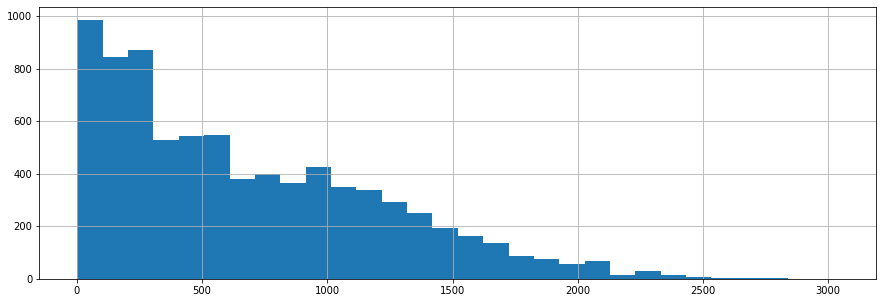

In [62]:
#顯示last_review_to_20190801的天數直方圖
df.last_review_to_20190801.hist(figsize=(15,5), bins=30);

In [63]:
# 將last_review_to_20190801依天數分類為 0-3 months, 3-6 months, 6-12 months,1+ years
bin_column('last_review_to_20190801',
           bins=[0, 91, 182, 365, max(df.last_review_to_20190801)],
           labels=['0-3 months',
                   '3-6 months',
                   '6-12 months',
                   '1+ years'],
           na_label='unknown')

In [64]:
#顯示分類後的各等級筆數
df.last_review_to_20190801.value_counts()

1+ years       4942
nan            1966
6-12 months    1410
0-3 months      848
3-6 months      771
Name: last_review_to_20190801, dtype: int64

In [65]:
#將空值補眾數 1+ years
df.last_review_to_20190801.replace('nan','1+ years', inplace=True)

In [66]:
#顯示修正後的各等級筆數
df.last_review_to_20190801.value_counts()

1+ years       6908
6-12 months    1410
0-3 months      848
3-6 months      771
Name: last_review_to_20190801, dtype: int64

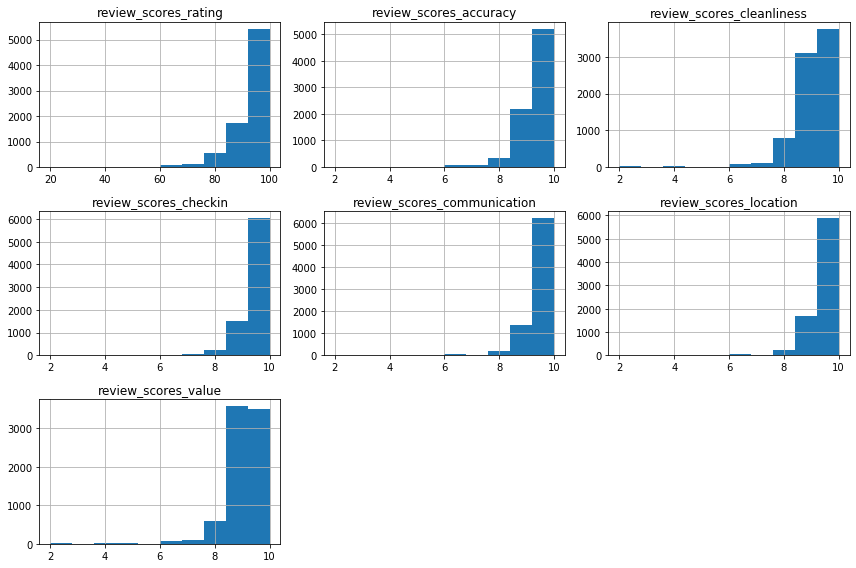

In [67]:
# 顯示review_scores_rating相關的的直方圖
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [68]:
#刪除review_scores相關的有空值的欄位
df.dropna(subset=['review_scores_rating'], inplace=True)
df.dropna(subset=['review_scores_accuracy'], inplace=True)
df.dropna(subset=['review_scores_cleanliness'], inplace=True)
df.dropna(subset=['review_scores_checkin'], inplace=True)
df.dropna(subset=['review_scores_communication'], inplace=True)
df.dropna(subset=['review_scores_location'], inplace=True)
df.dropna(subset=['review_scores_value'], inplace=True)

In [69]:
#顯示所有amenities的設施
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Breakfast',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling hoist',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Extra space around bed',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower',
 'Fixed grab bars for toilet',
 'Flat path to guest entrance',


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

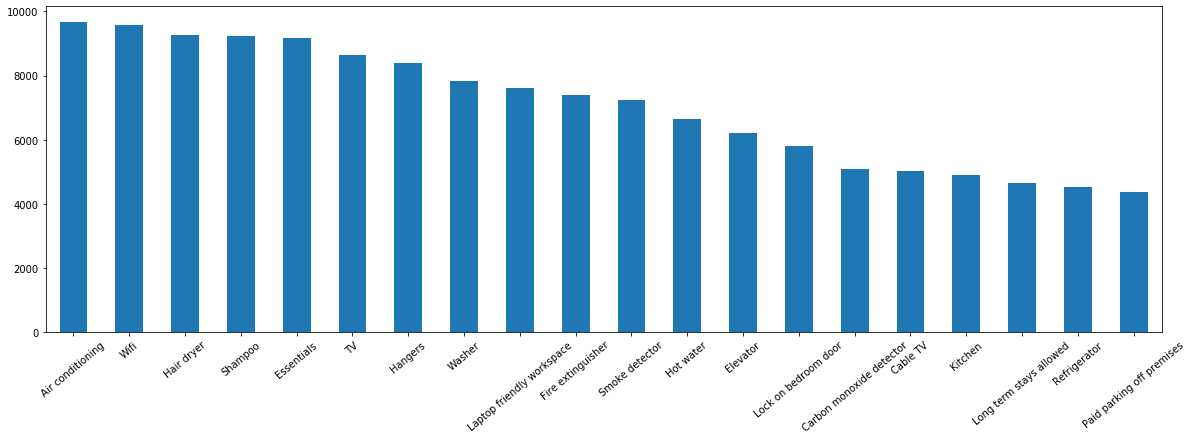

In [70]:
#抓取設施的Top 20
raw_df['amenities'] = raw_df.amenities.str.replace('[{}]' , '').str.replace('"','')
raw_df.amenities.head()
all_item_ls = np.concatenate(raw_df.amenities.map(lambda am:am.split(',')))
Top20_item = pd.Series(all_item_ls).value_counts().head(20)
plt.figure(figsize=  (20 , 6))
Top20_item.plot(kind = 'bar')
plt.xticks(rotation = 40)

In [71]:
#將Top 20設施改為T/F後個別新增20個欄位
df.loc[df['amenities'].str.contains('Air conditioning'), 'Air conditioning'] = 1
df.loc[df['amenities'].str.contains('Wifi'), 'Wifi'] = 1
df.loc[df['amenities'].str.contains('Hair dryer'), 'Hair dryer'] = 1
df.loc[df['amenities'].str.contains('Shampoo'), 'Shampoo'] = 1
df.loc[df['amenities'].str.contains('Essentials'), 'Essentials'] = 1
df.loc[df['amenities'].str.contains('TV'), 'TV'] = 1
df.loc[df['amenities'].str.contains('Hangers'), 'Hangers'] = 1
df.loc[df['amenities'].str.contains('Washer'), 'Washer'] = 1
df.loc[df['amenities'].str.contains('Laptop friendly workspace'), 'Laptop friendly workspace'] = 1
df.loc[df['amenities'].str.contains('Fire extinguisher'), 'Fire extinguisher'] = 1
df.loc[df['amenities'].str.contains('Smoke detector'), 'Smoke detector'] = 1
df.loc[df['amenities'].str.contains('Hot water'), 'Hot water'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'Elevator'] = 1
df.loc[df['amenities'].str.contains('Lock on bedroom door'), 'Lock on bedroom door'] = 1
df.loc[df['amenities'].str.contains('Carbon monoxide detector'), 'Carbon monoxide detector'] = 1
df.loc[df['amenities'].str.contains('Cable TV'), 'Cable TV'] = 1
df.loc[df['amenities'].str.contains('Kitchen'), 'Kitchen'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'Long term stays allowed'] = 1
df.loc[df['amenities'].str.contains('Refrigerator'), 'Refrigerator'] = 1
df.loc[df['amenities'].str.contains('Paid parking off premises'), 'Paid parking off premises'] = 1

In [72]:
#將新產的的欄位，空值設為0，並刪除原本的amenities欄位
cols_to_replace_nulls = df.iloc[:,41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)
df.drop('amenities', axis=1, inplace=True)

In [73]:
#修改後的檔案輸出
#df.to_csv('listing_new.csv', index = False)